# 遗传算法求解TSP问题

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
N_CITIES = 20           # 城市数量
CROSS_RATE = 0.5        # 交叉概率
MUTATE_RATE = 0.10      # 变异概率
POP_SIZE = 500          # 种群概率
N_GENERATIONS = 500     # 迭代次数

## GA类

通过面向对象的方法构建了遗传算法迭代类

In [22]:
class GA(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size, ):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])

    def translateDNA(self, DNA, city_position):         # 获得排序后的城市坐标
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)    # 把欧氏距离的影响扩大化
        return fitness, total_distance

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # 从pop中选择另外一个个体
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # 选择交叉点
            keep_city = parent[~cross_points]                                       # 找到城市的编号
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # 遍历每个父代
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

In [23]:
class TravelSalesPerson(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()

    def plotting(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, "总里程=%.2f" % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)


In [24]:
ga = GA(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

env = TravelSalesPerson(N_CITIES)
for generation in range(N_GENERATIONS):
    lx, ly = ga.translateDNA(ga.pop, env.city_position) #city_position（x,y）
    fitness, total_distance = ga.get_fitness(lx, ly)    #根据获得的路径计算路程
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)
    
    # 绘制迭代过程
    # env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

Gen: 0 | best fit: 127.60
Gen: 1 | best fit: 149.06
Gen: 2 | best fit: 219.71
Gen: 3 | best fit: 154.03
Gen: 4 | best fit: 177.95
Gen: 5 | best fit: 197.66
Gen: 6 | best fit: 212.90
Gen: 7 | best fit: 322.11
Gen: 8 | best fit: 317.41
Gen: 9 | best fit: 327.43
Gen: 10 | best fit: 327.43
Gen: 11 | best fit: 372.52
Gen: 12 | best fit: 287.63
Gen: 13 | best fit: 295.48
Gen: 14 | best fit: 304.66
Gen: 15 | best fit: 443.36
Gen: 16 | best fit: 430.85
Gen: 17 | best fit: 430.85
Gen: 18 | best fit: 430.85
Gen: 19 | best fit: 430.85
Gen: 20 | best fit: 430.85
Gen: 21 | best fit: 444.82
Gen: 22 | best fit: 430.85
Gen: 23 | best fit: 521.84
Gen: 24 | best fit: 569.73
Gen: 25 | best fit: 569.73
Gen: 26 | best fit: 656.28
Gen: 27 | best fit: 569.73
Gen: 28 | best fit: 432.50
Gen: 29 | best fit: 426.27
Gen: 30 | best fit: 410.84
Gen: 31 | best fit: 517.97
Gen: 32 | best fit: 534.80
Gen: 33 | best fit: 608.46
Gen: 34 | best fit: 615.66
Gen: 35 | best fit: 608.46
Gen: 36 | best fit: 584.84
Gen: 37 | b

KeyboardInterrupt: 

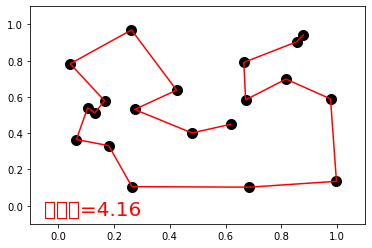

In [18]:
# 绘制最终的结果图形  
env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])
plt.ioff()
plt.show()